In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

color_list = ['#F5B7B1', '#D2B4DE', '#AED6F1', '#A2D9CE', '#ABEBC6', '#F9E79F', '#F5CBA7', '#CCD1D1']

In [3]:
labels = pd.read_csv('./dataset/labels.csv').astype(int)
fecha_dato = pd.read_csv('./dataset/train_ver2.csv', usecols=['fecha_dato'])

In [5]:
labels['date'] = fecha_dato.fecha_dato

In [7]:
months = np.unique(fecha_dato.fecha_dato).tolist()
label_cols = labels.columns.tolist()[:24]

In [9]:
label_over_time = []
for label in label_cols:
    label_over_time.append(labels.groupby(['date'])[label].agg('sum').tolist())

In [11]:
print(len(label_over_time))

24


In [12]:
label_sum_over_time = []
for i in range(len(label_cols)):
    label_sum_over_time.append(np.asarray(label_over_time[i:]).sum(axis=0))

In [39]:
def visualizeBarChart(sum_over_time):
    n_rows = len(sum_over_time)
    n_cols = len(sum_over_time[0]) 
    
    f, ax = plt.subplots(figsize=(30,15))
    for i in range(n_rows):
        sns.barplot(x=months[-n_cols:], y=sum_over_time[i], color=color_list[i%8], alpha=0.7)

    plt.legend([plt.Rectangle((0,0), 1, 1, fc=color_list[i%8], edgecolor='none') for i in range(len(label_cols))], label_cols, loc=1, ncol = 2, prop = {'size':16})

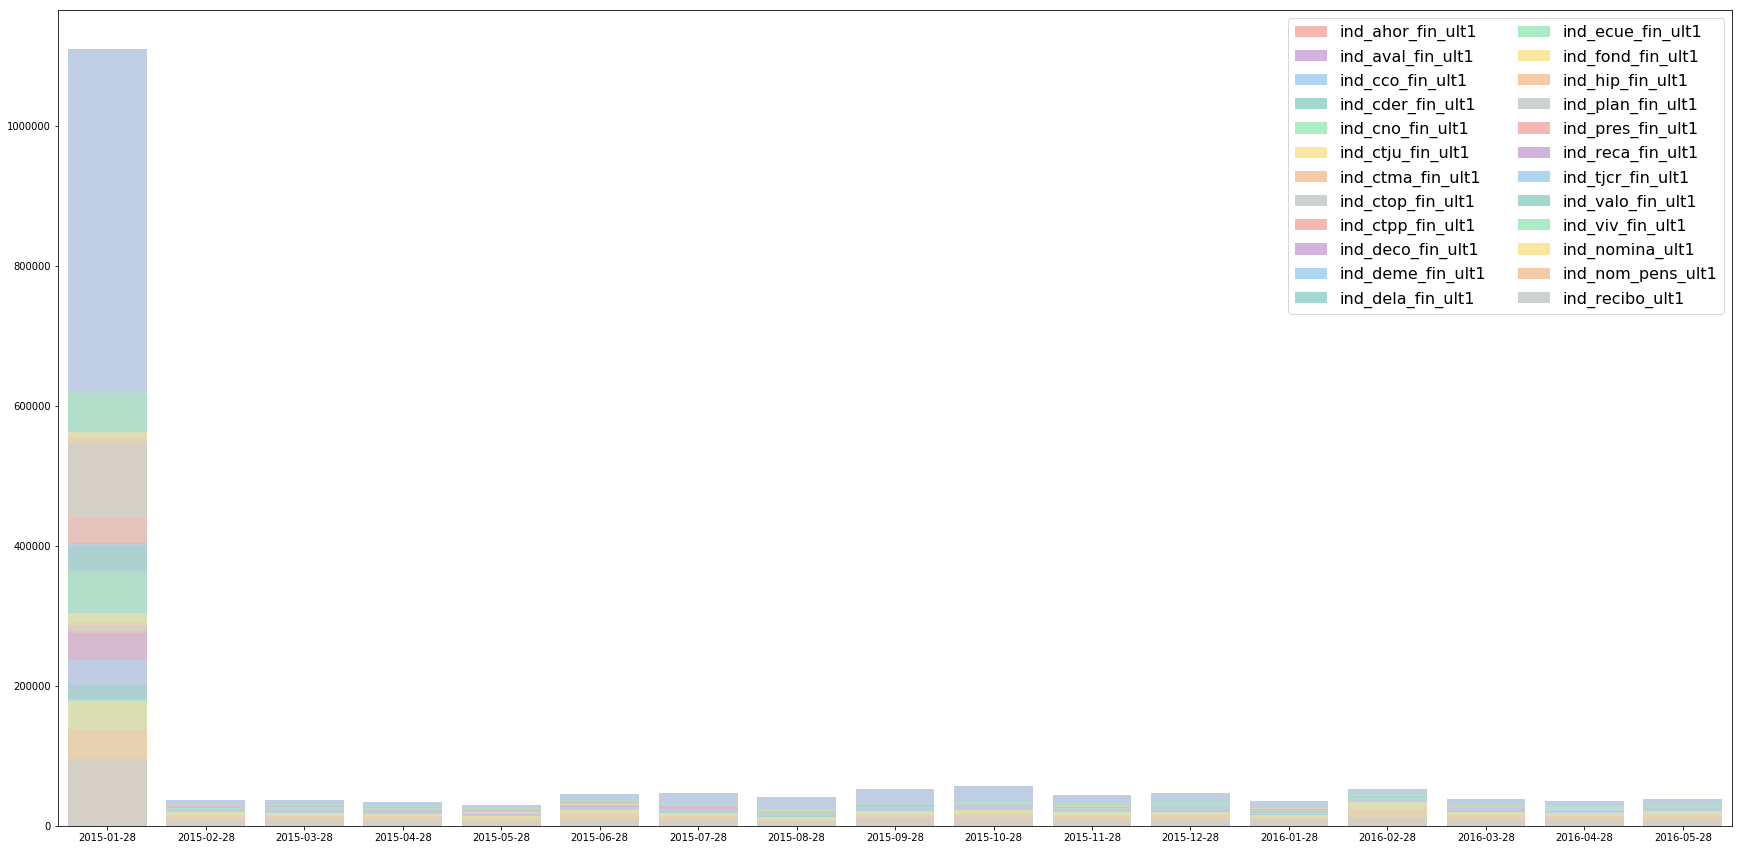

In [23]:
visualizeBarChart(label_sum_over_time)

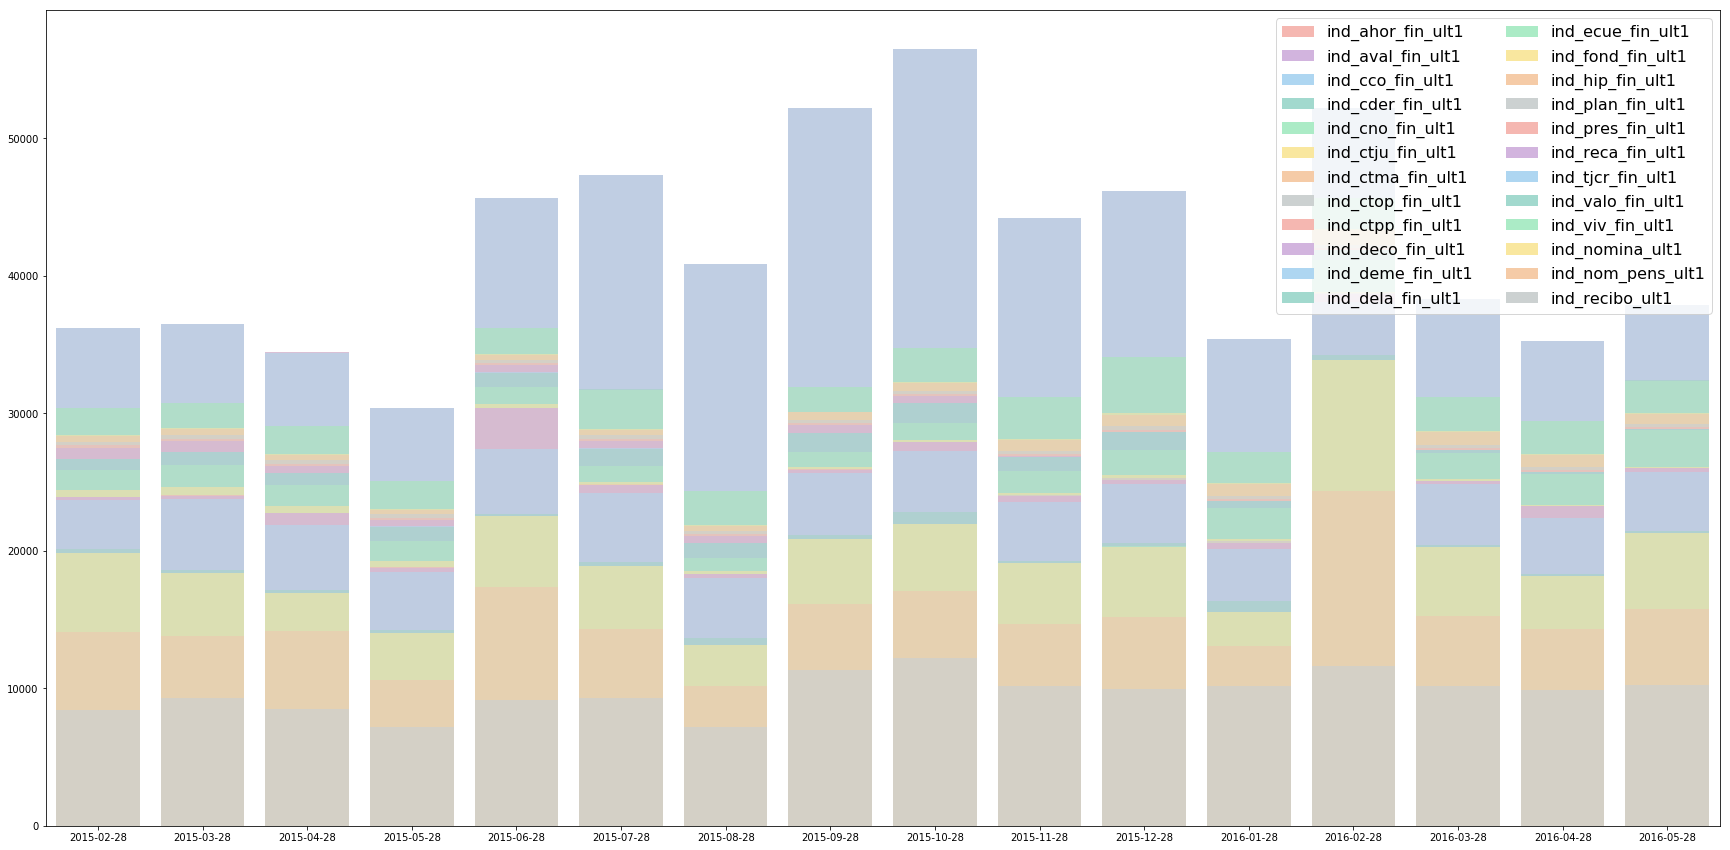

In [40]:
label_sum_over_time_except_first = [row[1:] for row in label_sum_over_time]
visualizeBarChart(label_sum_over_time_except_first)

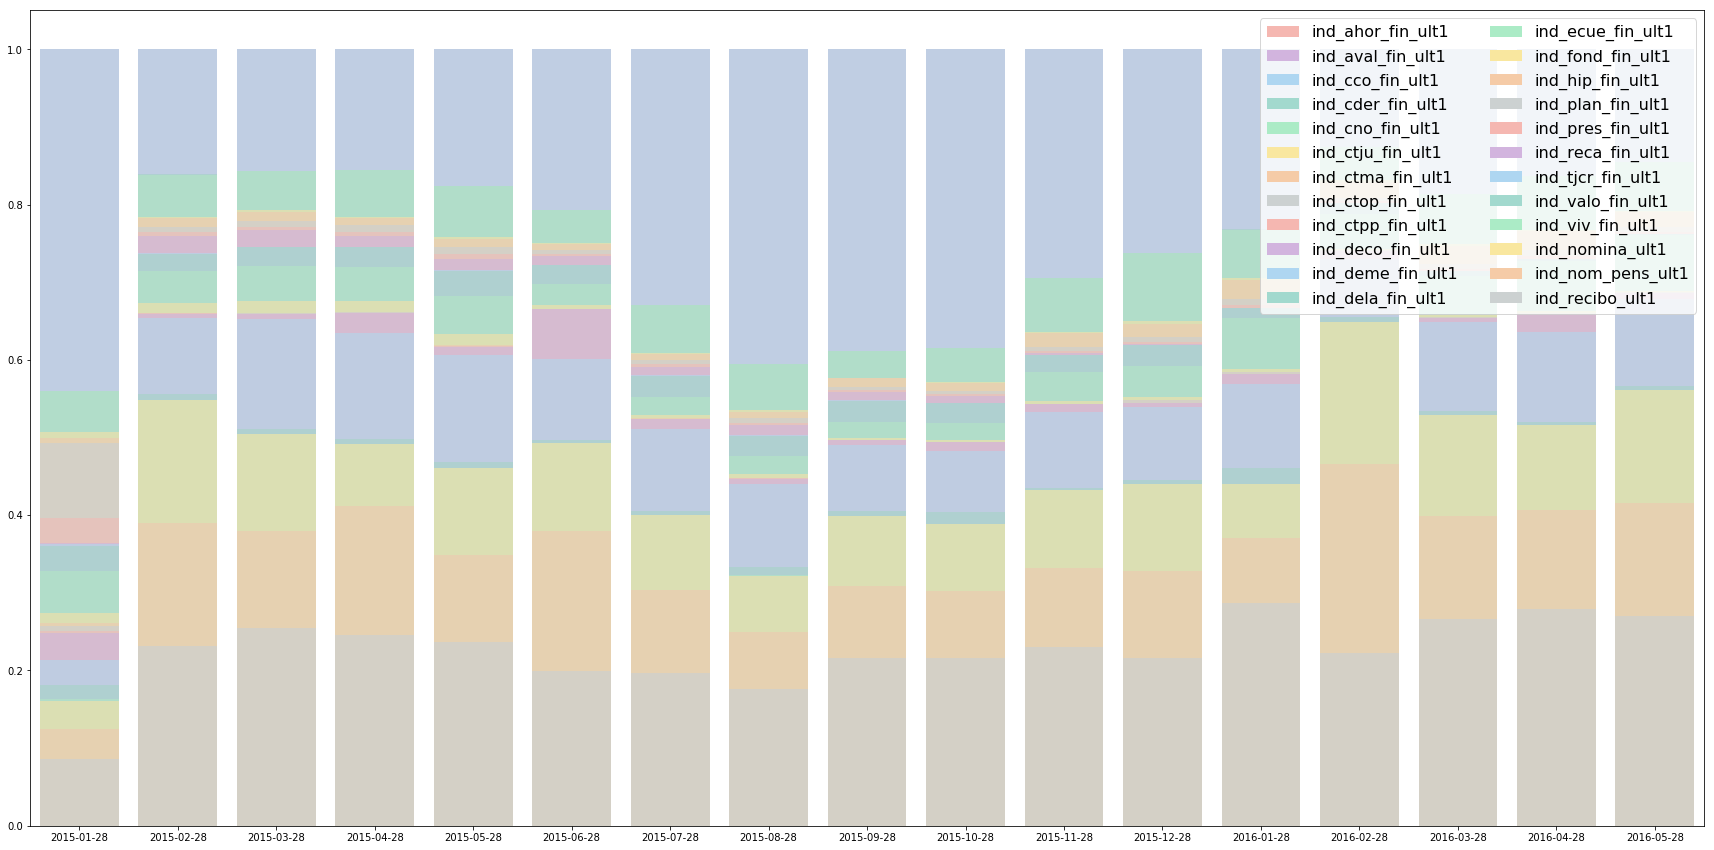

In [41]:
label_sum_percent = label_sum_over_time / label_sum_over_time[0]
visualizeBarChart(label_sum_percent)